In [1]:
!kaggle datasets download tleonel/cost-of-living -f costofliving-query-tweets.csv


Dataset URL: https://www.kaggle.com/datasets/tleonel/cost-of-living
License(s): CC0-1.0
costofliving-query-tweets.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [120]:
# Import necessary libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

In [121]:
import zipfile
zip_ref= zipfile.ZipFile('costofliving-query-tweets.csv.zip')
zip_ref.extractall()
zip_ref.close()

In [122]:
import pandas as pd
df = pd.read_csv("costofliving-query-tweets.csv")
df

,date_time,username,user_location,user_description,verified,followers_count,following_count,tweet_like_count,tweet_retweet_count,tweet_reply_count,source,tweet_text
0,2022-09-09 00:19:49+00:00,Beer_Enjoyer420,"District of Columbia, USA","I like news, weather, and sports updates! (And...",False,87,270,0,0,0,"<a href=""http://twitter.com/download/android"" ...","""UPS affects virtually every American and here..."
1,2022-09-09 00:19:48+00:00,MLAIrfanSabir,"Calgary, Treaty 7 Territory","The official account of MLA Irfan Sabir, JSS C...",True,7432,854,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",The UCP is not capable of giving Albertans a c...
2,2022-09-09 00:19:04+00:00,AFDJnews,Australia,ADFJ is your top Australian farming industry n...,False,26,77,0,0,0,"<a href=""https://help.twitter.com/en/using-twi...",Cost of living pushed up by climate-driven flo...
3,2022-09-09 00:18:51+00:00,LitmusTree,Yah Dads House,🇹🇼You looked through my profile after you saw ...,False,56,251,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@IIPatricio_ @Askechadd @emexdizzy @twinkbride...
4,2022-09-09 00:18:23+00:00,athenastits,they/them | 18 | uk | leftist,if it's not our flag means death it's the old ...,False,52,154,0,0,0,"<a href=""http://twitter.com/download/android"" ...",there's a massive cost of living crisis in the...
...,...,...,...,...,...,...,...,...,...,...,...,...
144957,2022-08-20 20:19:10+00:00,MaryTracy,England,Writer. Web Designer. Yoga teacher. #Yoga #Spi...,False,2277,2298,1,0,0,"<a href=""http://twitter.com/download/iphone"" r...",Eye opening thread on the cost of living in th...
144958,2022-08-20 20:18:57+00:00,_Fessial,NaN,#ModusPonens,False,767,571,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@KamalaHarris thats because people doing 2-3 j...
144959,2022-08-20 20:18:47+00:00,billyphillyboi,"Philadelphia, PA",Phillies|Eagles|Sixers|Packers|Sports and Poli...,False,2763,2860,3,0,1,"<a href=""https://mobile.twitter.com"" rel=""nofo...","@CheerSquad88 @JoshShapiroPA Nothing, he's goi..."
144960,2022-08-20 20:18:23+00:00,AnnaDe_2015,London,Global/European healthcare public affairs prof...,False,934,1855,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",Looks like the UK government’s feeble attempts...


In [123]:
df['tweet_text'].head(2)

0    "UPS affects virtually every American and here...
1    The UCP is not capable of giving Albertans a c...
Name: tweet_text, dtype: object

In [124]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words, lemmatizer, and punctuation
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
punctuation = string.punctuation

# Define a function to clean and preprocess the text
def preprocess_tweet_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs, mentions (@username), and hashtags
    text = re.sub(r"http\S+|www\S+|https\S+|@\S+|#\S+", '', text, flags=re.MULTILINE)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', punctuation))
    
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Remove stop words and non-alphabetic tokens, and lemmatize the words
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    
    # Return the cleaned and preprocessed text as a single string
    return ' '.join(cleaned_tokens)

# Apply the preprocessing to the 'tweet_text' column
df['cleaned_tweet_text'] = df['tweet_text'].apply(preprocess_tweet_text)

# Display the first few rows of the cleaned data
df[['tweet_text', 'cleaned_tweet_text']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/preethijayakumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/preethijayakumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/preethijayakumar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_text,cleaned_tweet_text
0,"""UPS affects virtually every American and here...",ups affect virtually every american here dont ...
1,The UCP is not capable of giving Albertans a c...,ucp capable giving albertans competent respons...
2,Cost of living pushed up by climate-driven flo...,cost living pushed climatedriven flood say far...
3,@IIPatricio_ @Askechadd @emexdizzy @twinkbride...,could higher cost cost living wealthy get want...
4,there's a massive cost of living crisis in the...,there massive cost living crisis uk rn abt fun...


In [125]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

In [126]:


# Step 1: Vectorization
# Using Count Vectorizer to create a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tweet_term_matrix = vectorizer.fit_transform(df['cleaned_tweet_text'])

# Step 2: LDA Model
# Define the number of topics
num_topics = 4

# Create and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tweet_term_matrix)

# Step 3: Extracting the topics and their top words
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx + 1}"] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Define the number of top words to display per topic
no_top_words = 10

# Display the top words for each topic
topics = display_topics(lda_model, feature_names, no_top_words)

# Convert topics to a DataFrame for better readability and display
topics_df = pd.DataFrame(topics)

# Display the topics DataFrame
print(topics_df)

# Return the topics for further use
topics


   Topic 1       Topic 2    Topic 3  Topic 4
0     cost        crisis       cost     cost
1   living          cost     living   living
2   people        living       high   crisis
3   crisis  costofliving       wage   energy
4     help            uk        pay      amp
5    money        energy  inflation    right
6     need         truss   increase     like
7    going          tory        tax       uk
8  support    government      price      war
9  payment           new       year  country


{'Topic 1': ['cost',
  'living',
  'people',
  'crisis',
  'help',
  'money',
  'need',
  'going',
  'support',
  'payment'],
 'Topic 2': ['crisis',
  'cost',
  'living',
  'costofliving',
  'uk',
  'energy',
  'truss',
  'tory',
  'government',
  'new'],
 'Topic 3': ['cost',
  'living',
  'high',
  'wage',
  'pay',
  'inflation',
  'increase',
  'tax',
  'price',
  'year'],
 'Topic 4': ['cost',
  'living',
  'crisis',
  'energy',
  'amp',
  'right',
  'like',
  'uk',
  'war',
  'country']}

In [10]:
#Topic 1: General Financial Struggles and Support
#Topic 2: Government Response and Political Leadership
#Topic 3: Income, Wages, and Inflation
#Topic 4: Global Impact on Energy and Economy

In [127]:
 # Step 1: Topic Interpretation based on the top words
topic_labels = {
    0: "Cost of Living - General",
    1: "Government Response and Political Leadership",
    2: "Income, Wages, and Inflation",
    3: "Global Impact on Energy and Economy",
    
}

# Step 2: Assigning topics to each tweet
# Transform the document-term matrix to get the topic distribution for each tweet
tweet_topic_distribution = lda_model.transform(tweet_term_matrix)

# Get the most probable topic for each tweet
assigned_topics = tweet_topic_distribution.argmax(axis=1)

# Map the topic numbers to the interpreted labels
assigned_topic_labels = [topic_labels[topic] for topic in assigned_topics]

# Add the assigned topic labels to the sampled dataframe
df['Assigned Topic'] = assigned_topic_labels

# Display the dataframe with the original tweet and the assigned topic
df[['cleaned_tweet_text', 'Assigned Topic']].head()


,cleaned_tweet_text,Assigned Topic
0,ups affect virtually every american here dont ...,"Income, Wages, and Inflation"
1,ucp capable giving albertans competent respons...,"Income, Wages, and Inflation"
2,cost living pushed climatedriven flood say far...,Global Impact on Energy and Economy
3,could higher cost cost living wealthy get want...,Cost of Living - General
4,there massive cost living crisis uk rn abt fun...,Cost of Living - General


In [128]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder

#I will apply the sentiment analysis on the cleaned tweets from the dataframe

# Initialize the sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to categorize sentiment based on the compound score
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis on the cleaned tweets and categorize them
df['Sentiment_label'] = df['cleaned_tweet_text'].apply(lambda x: sid.polarity_scores(x)['compound']).apply(categorize_sentiment)

# Group by the assigned topic and calculate the sentiment distribution
sentiment_by_topic = df.groupby('Assigned Topic')['Sentiment_label'].value_counts(normalize=True).unstack().fillna(0)

# Display the sentiment by topic
print(sentiment_by_topic)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/preethijayakumar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment_label                               Negative   Neutral  Positive
Assigned Topic                                                            
Cost of Living - General                      0.495482  0.102979  0.401539
Global Impact on Energy and Economy           0.733461  0.081591  0.184948
Government Response and Political Leadership  0.696926  0.070472  0.232602
Income, Wages, and Inflation                  0.409921  0.145559  0.444519


In [103]:
#labels = []



# Loop through each tweet and label it
#for tweet in df['cleaned_tweet_text']:
#    labels.append(label_tweet(tweet))

# Add the labels to the dataframe
#df['Sentiment_label'] = labels



In [129]:
# Save the labeled dataset
df.to_csv("labeled_tweets.csv", index=False)

In [130]:
# Display the cleaned tweets along with their sentiment labels
print(df[['cleaned_tweet_text', 'Assigned Topic', 'Sentiment_label']])

                                       cleaned_tweet_text  \
0       ups affect virtually every american here dont ...   
1       ucp capable giving albertans competent respons...   
2       cost living pushed climatedriven flood say far...   
3       could higher cost cost living wealthy get want...   
4       there massive cost living crisis uk rn abt fun...   
...                                                   ...   
144957  eye opening thread cost living ussr always tak...   
144958          thats people job cu cost living roof gtfo   
144959  nothing he going help make inflation worse rai...   
144960  look like uk government feeble attempt tackle ...   
144961         cost living help coming say kwasi kwarteng   

                             Assigned Topic Sentiment_label  
0              Income, Wages, and Inflation        Negative  
1              Income, Wages, and Inflation        Positive  
2       Global Impact on Energy and Economy         Neutral  
3                  

## EDA

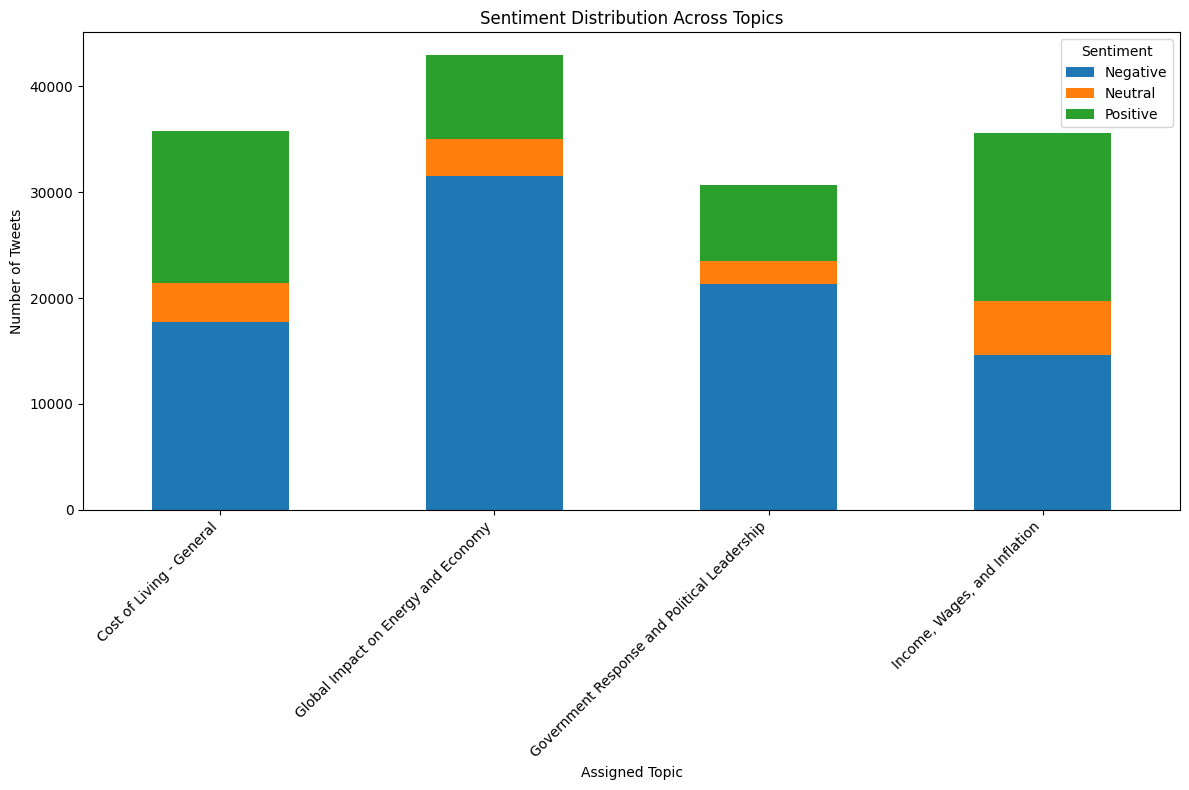

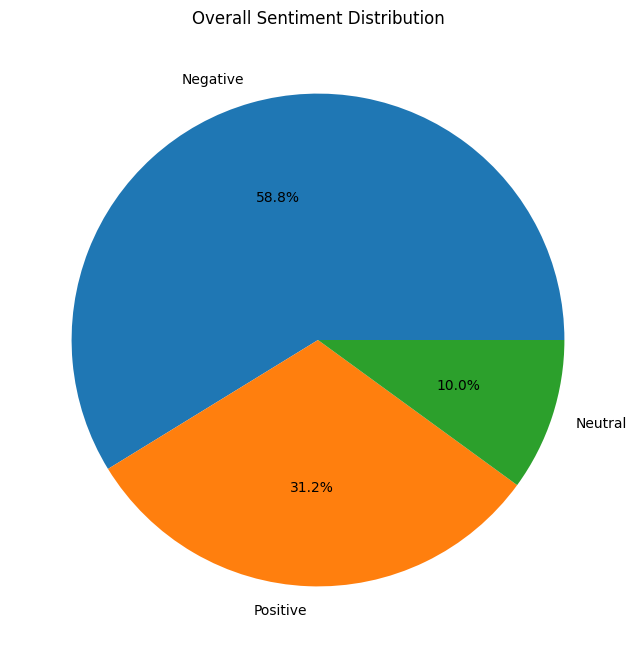

In [131]:
import matplotlib.pyplot as plt

# Group by 'Assigned Topic' and 'Sentiment_Vader' to count the number of tweets per sentiment for each topic
sentiment_by_topic = df.groupby(['Assigned Topic', 'Sentiment_label']).size().unstack().fillna(0)

# Plotting the sentiment distribution across topics
sentiment_by_topic.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution Across Topics')
plt.xlabel('Assigned Topic')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting overall sentiment distribution
overall_sentiment_distribution = df['Sentiment_label'].value_counts()

overall_sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Overall Sentiment Distribution')
plt.ylabel('')
plt.show()

In [132]:
# Basic Information: Checking for missing values and duplicates
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

# Summary statistics for numerical columns
summary_statistics = df.describe()

# Display the findings
missing_values, duplicates, summary_statistics


(date_time                  0
 username                   0
 user_location          44542
 user_description       19957
 verified                   0
 followers_count            0
 following_count            0
 tweet_like_count           0
 tweet_retweet_count        0
 tweet_reply_count          0
 source                     0
 tweet_text                 0
 cleaned_tweet_text         0
 Assigned Topic             0
 Sentiment_label            0
 dtype: int64,
 0,
        followers_count  following_count  tweet_like_count  \
 count     1.449620e+05    144962.000000     144962.000000   
 mean      4.474875e+04      1735.925436         16.859922   
 std       6.100741e+05      5974.358049        491.427720   
 min       0.000000e+00         0.000000          0.000000   
 25%       1.020000e+02       186.000000          0.000000   
 50%       5.570000e+02       632.000000          1.000000   
 75%       2.439750e+03      1800.000000          2.000000   
 max       5.422480e+07    638937.0

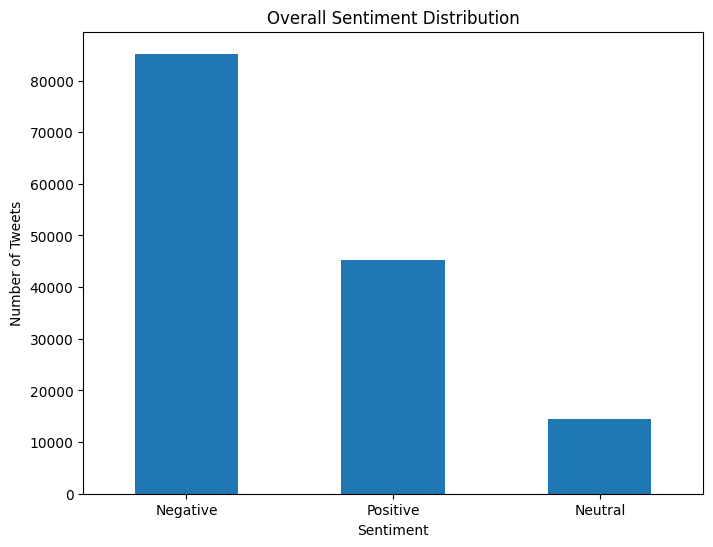

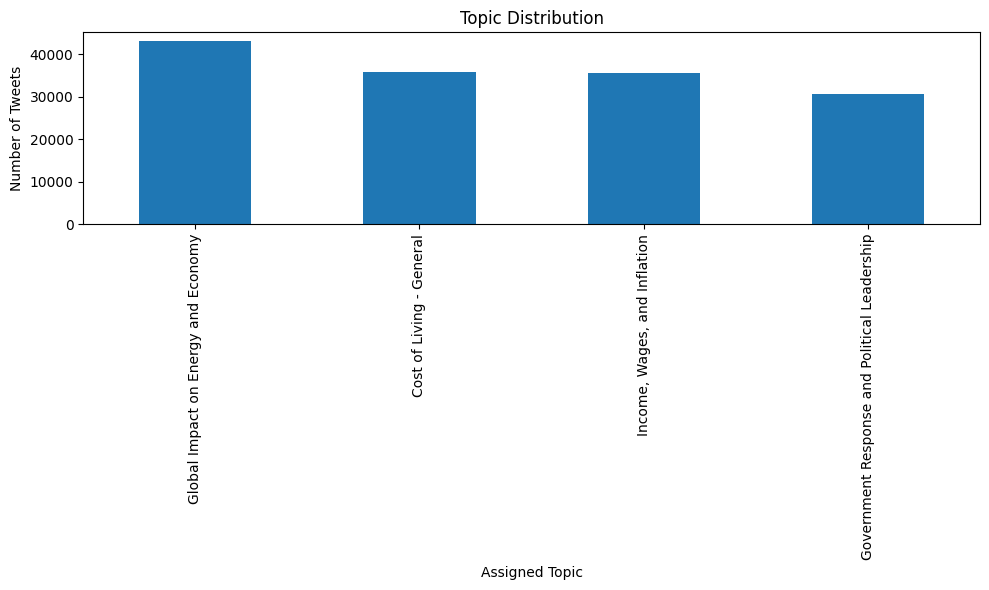

In [133]:
# Reimporting necessary library for plotting
import matplotlib.pyplot as plt

# Sentiment Distribution and Topic Popularity

# Plot overall sentiment distribution
sentiment_counts = df['Sentiment_label'].value_counts()

# Plotting sentiment distribution as a bar chart
sentiment_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

# Plot topic distribution
topic_counts = df['Assigned Topic'].value_counts()

# Plotting topic distribution as a bar chart
topic_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Topic Distribution')
plt.xlabel('Assigned Topic')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


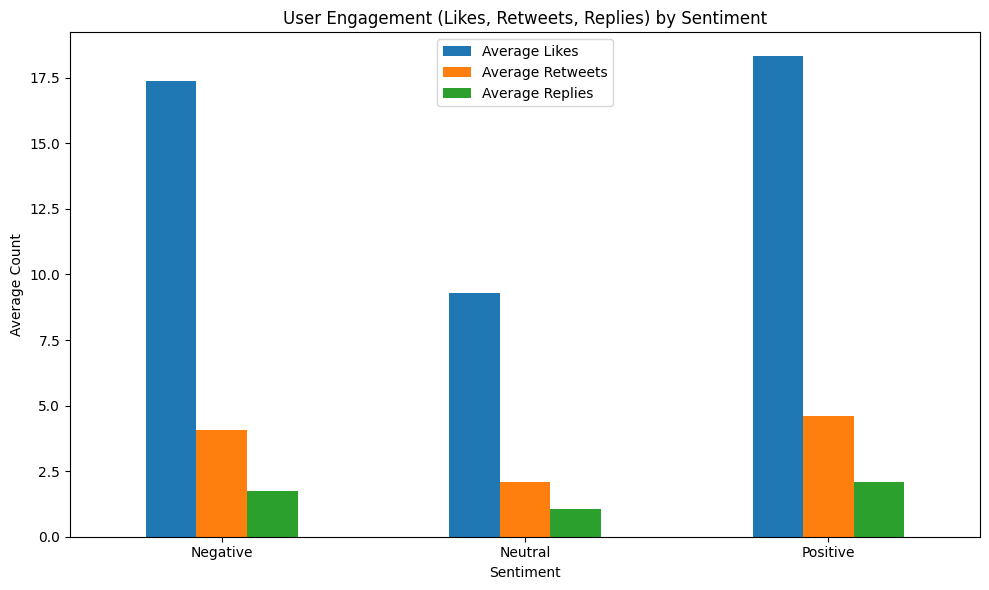

In [134]:
# Analyzing sentiment vs. user engagement (likes, retweets, replies)

# Group by sentiment and calculate mean engagement metrics
engagement_by_sentiment = df.groupby('Sentiment_label').agg({
    'tweet_like_count': 'mean',
    'tweet_retweet_count': 'mean',
    'tweet_reply_count': 'mean'
})

# Plotting user engagement by sentiment
engagement_by_sentiment.plot(kind='bar', figsize=(10, 6))
plt.title('User Engagement (Likes, Retweets, Replies) by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.legend(['Average Likes', 'Average Retweets', 'Average Replies'])
plt.tight_layout()
plt.show()


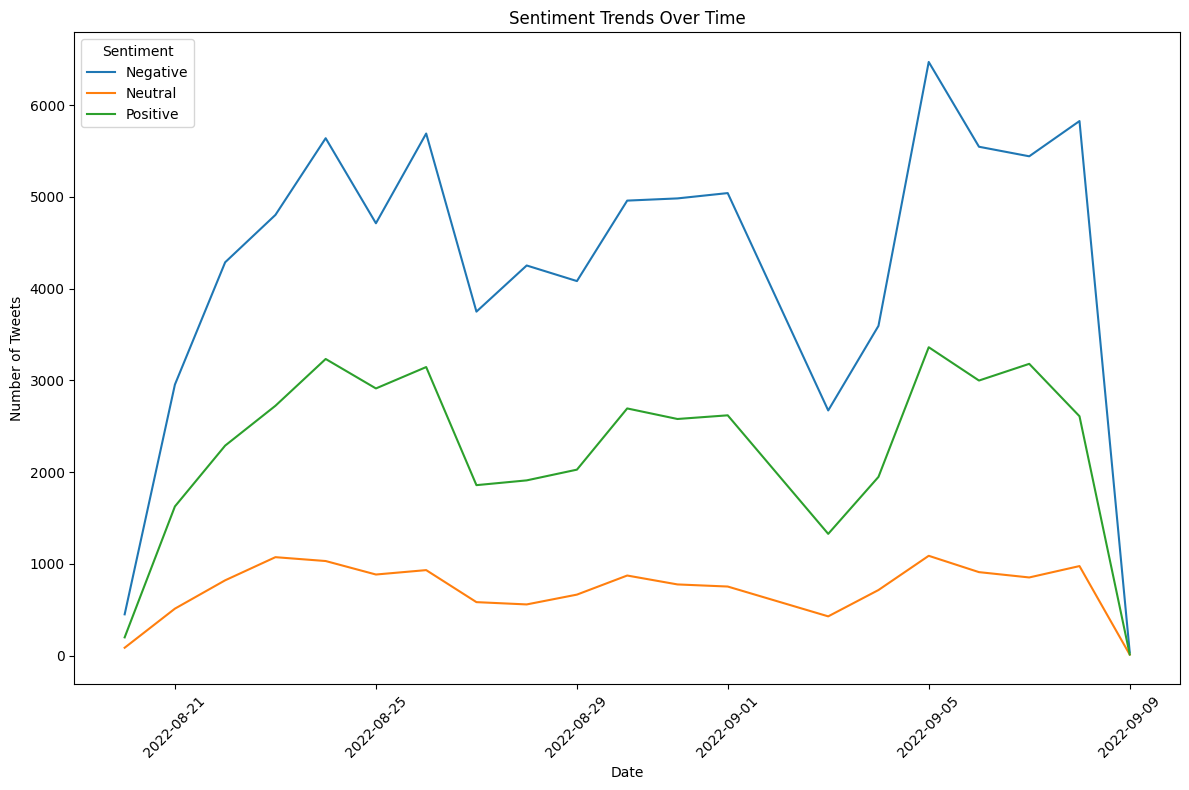

In [135]:
# Converting 'date_time' to datetime format to analyze trends over time
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Adding a column for just the date (to group by)
df['date'] = df['date_time'].dt.date

# Grouping the data by date and sentiment to count the number of tweets for each sentiment per day
sentiment_over_time = df.groupby(['date', 'Sentiment_label']).size().unstack(fill_value=0)

# Plotting sentiment trends over time
sentiment_over_time.plot(figsize=(12, 8))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [136]:
# Identifying the top 5 dates with the highest total tweet volume
top_dates = sentiment_over_time.sum(axis=1).sort_values(ascending=False).head(5)

# Display the top 5 dates with high activity
top_dates


date
2022-09-05    10919
2022-08-24     9903
2022-08-26     9767
2022-09-07     9474
2022-09-06     9454
dtype: int64

The top 5 dates with the highest tweet volumes are:

September 5, 2022 (10,919 tweets)
August 24, 2022 (9,903 tweets)
August 26, 2022 (9,767 tweets)
September 7, 2022 (9,474 tweets)
September 6, 2022 (9,454 tweets)

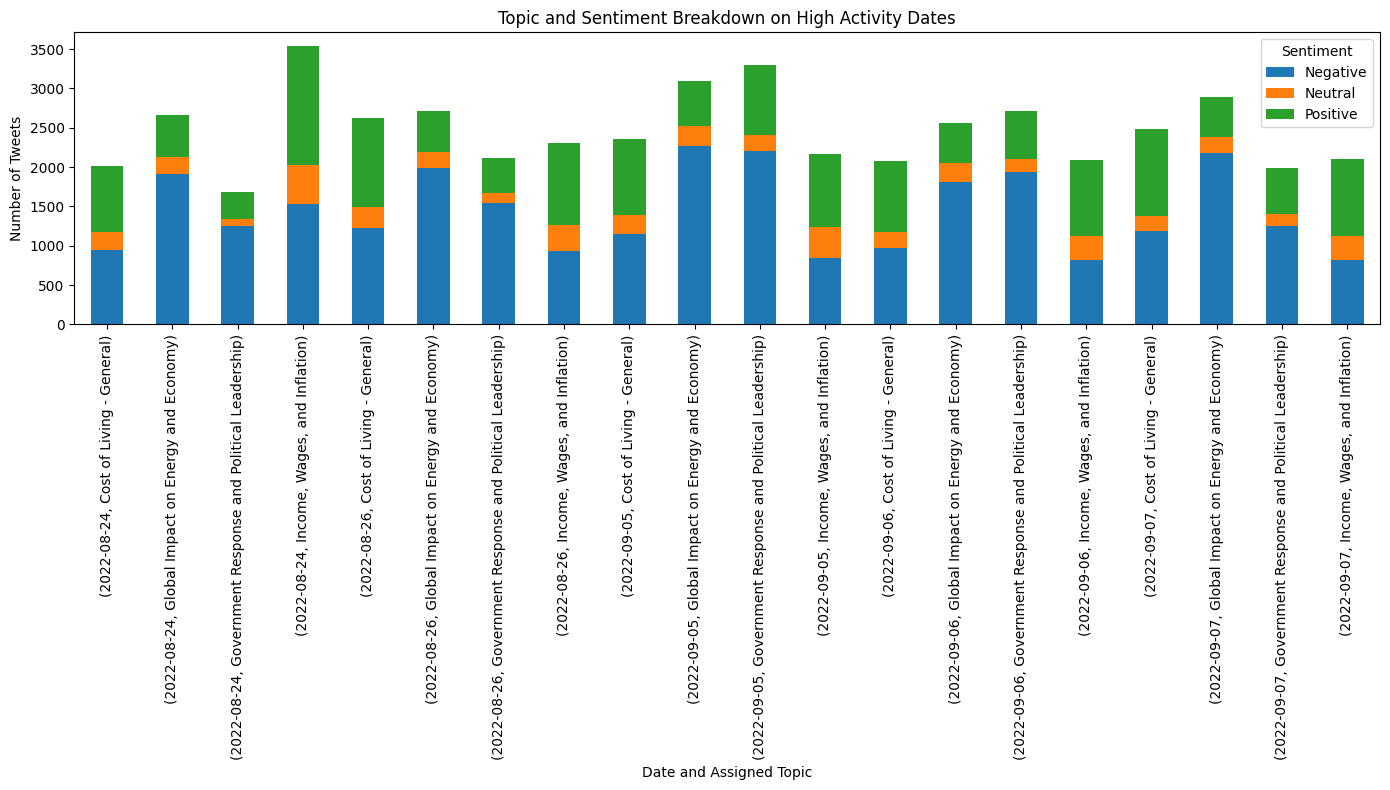

In [137]:
# Filter the dataset for the top 5 dates with the highest activity
top_activity_dates = df[df['date'].isin(top_dates.index)]

# Group by date, assigned topic, and sentiment to count tweets per combination
topic_sentiment_on_top_dates = top_activity_dates.groupby(['date', 'Assigned Topic', 'Sentiment_label']).size().unstack(fill_value=0)

# Plotting the topic distribution with sentiment breakdown for the top 5 dates
topic_sentiment_on_top_dates.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Topic and Sentiment Breakdown on High Activity Dates')
plt.xlabel('Date and Assigned Topic')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


Insights from High-Activity Dates:
--> September 5, 2022, shows the largest spike, with a balanced distribution of positive, negative, and neutral tweets. The predominant topics are diverse, suggesting a broad range of discussions.
--> August 24, 2022, and August 26, 2022, both have noticeable spikes, with some topics showing a higher concentration of negative sentiment. This might indicate controversy or dissatisfaction related to certain events or issues.
--> September 6, 2022, and September 7, 2022, also show substantial tweet activity, with the sentiment skewed toward either positive or neutral, depending on the topics discussed.


In [138]:
# Calculate the proportion of each sentiment for each topic
topic_sentiment_distribution = df.groupby('Assigned Topic')['Sentiment_label'].value_counts(normalize=True).unstack(fill_value=0)

# Identify topics with high negative sentiment (e.g., > 50% negative tweets)
controversial_topics_negative = topic_sentiment_distribution[topic_sentiment_distribution['Negative'] > 0.5]

# Identify polarizing topics (roughly balanced positive and negative sentiment)
controversial_topics_polarized = topic_sentiment_distribution[
    (topic_sentiment_distribution['Positive'] > 0.3) & (topic_sentiment_distribution['Negative'] > 0.3)
]

# Display both sets of controversial topics
controversial_topics_negative, controversial_topics_polarized


(Sentiment_label                               Negative   Neutral  Positive
 Assigned Topic                                                            
 Global Impact on Energy and Economy           0.733461  0.081591  0.184948
 Government Response and Political Leadership  0.696926  0.070472  0.232602,
 Sentiment_label               Negative   Neutral  Positive
 Assigned Topic                                            
 Cost of Living - General      0.495482  0.102979  0.401539
 Income, Wages, and Inflation  0.409921  0.145559  0.444519)

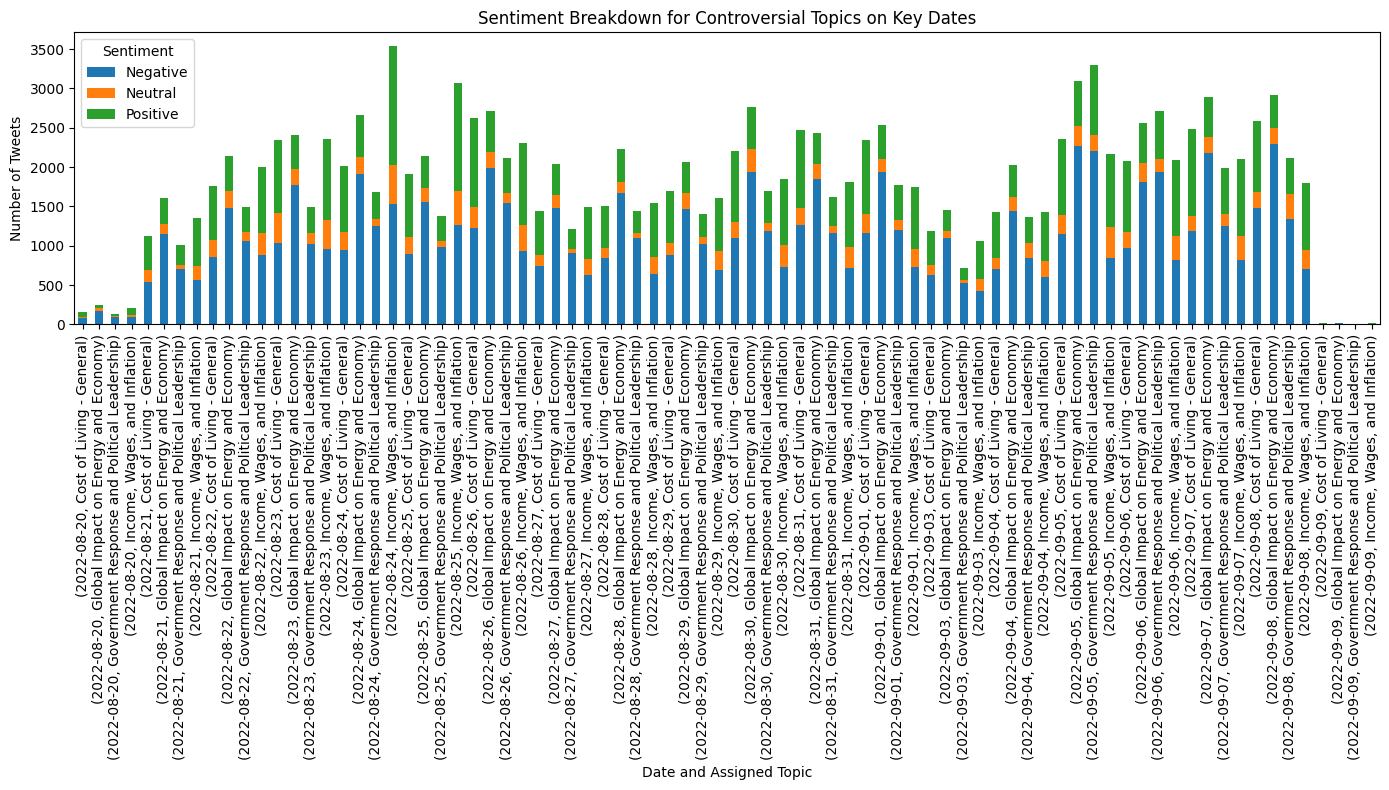

In [139]:
# Filter the dataset for tweets related to the identified controversial topics
controversial_topic_names = [
    'Global Impact on Energy and Economy',
    'Government Response and Political Leadership',
    'Cost of Living - General',
    'Income, Wages, and Inflation'
]

controversial_tweets = df[df['Assigned Topic'].isin(controversial_topic_names)]

# Group by date, assigned topic, and sentiment to count tweets per combination
controversial_topics_over_time = controversial_tweets.groupby(['date', 'Assigned Topic', 'Sentiment_label']).size().unstack(fill_value=0)

# Plotting the controversial topics with sentiment breakdown over time
controversial_topics_over_time.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Sentiment Breakdown for Controversial Topics on Key Dates')
plt.xlabel('Date and Assigned Topic')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


Insights from Controversial Topics Over Time:
--> Global Impact on Energy and Economy and Government Response and Political Leadership consistently show a high proportion of negative sentiment, especially during spikes in tweet activity (e.g., on September 5, 2022). This indicates significant dissatisfaction, potentially driven by global crises like rising energy costs or political decisions.

--> Cost of Living - General and Income, Wages, and Inflation are more polarizing topics. There’s a substantial mix of both positive and negative sentiment, reflecting the complexity of public opinion. These issues might be connected to rising inflation and wage stagnation, which resonate differently depending on personal circumstances or political views.

In [140]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from afinn import Afinn
from textblob import TextBlob
import nltk



# Ensure nltk resources are downloaded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/preethijayakumar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [141]:
# Step 1: Define the features and labels
X = df['cleaned_tweet_text']  # Features (text data)
Y = df['Sentiment_label'] 

In [142]:
# Step 2: Split the data into training and cross-validation sets
X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.3, random_state=50)


# Display the size of the training and validation sets
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_cv)}")

Training set size: 101473
Validation set size: 43489


In [143]:
# Step 3: TF-IDF Vectorization on the training and cross-validation sets
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit on training data and transform both training and cross-validation data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_cv_tfidf = tfidf_vectorizer.transform(X_cv)

In [144]:
# Step 4: LSA (Latent Semantic Analysis) using TruncatedSVD on TF-IDF features
lsa_model = TruncatedSVD(n_components=4, random_state=50)
X_train_lsa = lsa_model.fit_transform(X_train_tfidf)
X_cv_lsa = lsa_model.transform(X_cv_tfidf)



In [145]:
# Step 4: Sentiment Analysis with AFINN and TextBlob on the validation set
afinn = Afinn()
X_cv_afinn_sentiment = X_cv.apply(lambda x: 'Positive' if afinn.score(x) > 0 else ('Negative' if afinn.score(x) < 0 else 'Neutral'))

X_cv_textblob_sentiment = X_cv.apply(lambda x: 'Positive' if TextBlob(x).sentiment.polarity > 0 else ('Negative' if TextBlob(x).sentiment.polarity < 0 else 'Neutral'))


In [146]:
# Step 5: Compare sentiment labels with VADER-generated labels (y_cv)
# For AFINN
from sklearn.metrics import accuracy_score, classification_report

afinn_accuracy = accuracy_score(y_cv, X_cv_afinn_sentiment)
afinn_report = classification_report(y_cv, X_cv_afinn_sentiment)
print("AFINN Model Accuracy:", afinn_accuracy)
print(afinn_report)

AFINN Model Accuracy: 0.8255420911034974
              precision    recall  f1-score   support

    Negative       0.89      0.91      0.90     25528
     Neutral       0.49      0.75      0.59      4291
    Positive       0.88      0.70      0.78     13670

    accuracy                           0.83     43489
   macro avg       0.75      0.78      0.76     43489
weighted avg       0.85      0.83      0.83     43489



In [147]:

# For TextBlob
textblob_accuracy = accuracy_score(y_cv, X_cv_textblob_sentiment)
textblob_report = classification_report(y_cv, X_cv_textblob_sentiment)
print("TextBlob Model Accuracy:", textblob_accuracy)
print(textblob_report)

TextBlob Model Accuracy: 0.4541608222768976
              precision    recall  f1-score   support

    Negative       0.76      0.34      0.47     25528
     Neutral       0.17      0.49      0.26      4291
    Positive       0.45      0.65      0.53     13670

    accuracy                           0.45     43489
   macro avg       0.46      0.50      0.42     43489
weighted avg       0.61      0.45      0.47     43489



In [148]:
# Step 6: Choose the best model based on accuracy and classification report
best_model = None
best_accuracy = 0
if afinn_accuracy > textblob_accuracy:
    best_model = "AFINN"
    best_accuracy = afinn_accuracy
    best_report = afinn_report
else:
    best_model = "TextBlob"
    best_accuracy = textblob_accuracy
    best_report = textblob_report

print(f"\nBest Model: {best_model}")
print(f"Best Model Accuracy: {best_accuracy}")
print(best_report)


Best Model: AFINN
Best Model Accuracy: 0.8255420911034974
              precision    recall  f1-score   support

    Negative       0.89      0.91      0.90     25528
     Neutral       0.49      0.75      0.59      4291
    Positive       0.88      0.70      0.78     13670

    accuracy                           0.83     43489
   macro avg       0.75      0.78      0.76     43489
weighted avg       0.85      0.83      0.83     43489



In [152]:
def extract_topics_lda(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx + 1}"] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics


In [157]:
#lda_topics = extract_topics_lda(lda_model, vectorizer.get_feature_names_out(), no_top_words)
#lda_topics_df = pd.DataFrame(lda_topics)

In [156]:
#def extract_topics_lsa(model, feature_names, no_top_words):
#   topics = {}
#    for topic_idx, topic in enumerate(model.components_):
#        topics[f"Topic {topic_idx + 1}"] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
#   return topics


In [158]:
#lsa_topics = extract_topics_lsa(lsa_model, vectorizer.get_feature_names_out(), no_top_words)
#lsa_topics_df = pd.DataFrame(lsa_topics)

In [33]:
print("LDA Topics:")
print(lda_topics_df)
print("\nLSA Topics:")
print(lsa_topics_df)


LDA Topics:
   Topic 1       Topic 2   Topic 3     Topic 4
0   crisis        crisis      cost      crisis
1     cost          cost    living        cost
2   living        living    people      living
3     sign         truss       pay        tory
4  article  costofliving    crisis      people
5    right          help      wage  government
6   people        energy      high     country
7       uk           liz  increase         amp
8   update       payment       tax        like
9    legal      minister      year      energy

LSA Topics:
      Topic 1    Topic 2   Topic 3       Topic 4
0        cost     series    crisis         truss
1      living      legal    living           liz
2      crisis    receive      cost  costofliving
3      people       sign  costfree        crisis
4      energy  empowered      tory        energy
5        help    article  strategy      minister
6          uk     update  lockdown            uk
7  government      email     greed         prime
8        tory    

# ML models

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=50)
lr_model.fit(X_train_tfidf, y_train)

# Predict on cross-validation set
y_pred_lr = lr_model.predict(X_cv_tfidf)

# Evaluate Logistic Regression model
lr_accuracy = accuracy_score(y_cv, y_pred_lr)
lr_report = classification_report(y_cv, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)
print(lr_report)


/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8875347789096093
              precision    recall  f1-score   support

    Negative       0.90      0.95      0.92     25528
     Neutral       0.86      0.60      0.71      4291
    Positive       0.87      0.86      0.86     13670

    accuracy                           0.89     43489
   macro avg       0.88      0.80      0.83     43489
weighted avg       0.89      0.89      0.88     43489



In [160]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear', random_state=50)
svm_model.fit(X_train_tfidf, y_train)

# Predict on cross-validation set
y_pred_svm = svm_model.predict(X_cv_tfidf)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_cv, y_pred_svm)
svm_report = classification_report(y_cv, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print(svm_report)


SVM Accuracy: 0.891535790659707
              precision    recall  f1-score   support

    Negative       0.91      0.94      0.93     25528
     Neutral       0.83      0.66      0.73      4291
    Positive       0.87      0.87      0.87     13670

    accuracy                           0.89     43489
   macro avg       0.87      0.82      0.84     43489
weighted avg       0.89      0.89      0.89     43489



In [193]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=50)
rf_model.fit(X_train_tfidf, y_train)

# Predict on cross-validation set
y_pred_rf = rf_model.predict(X_cv_tfidf)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_cv, y_pred_rf)
rf_report = classification_report(y_cv, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print(rf_report)


Random Forest Accuracy: 0.8275196026581434
              precision    recall  f1-score   support

    Negative       0.84      0.92      0.88     25528
     Neutral       0.78      0.61      0.68      4291
    Positive       0.81      0.72      0.77     13670

    accuracy                           0.83     43489
   macro avg       0.81      0.75      0.78     43489
weighted avg       0.83      0.83      0.82     43489



In [194]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=50)
dt_model.fit(X_train_tfidf, y_train)

# Predict on cross-validation set
y_pred_dt = dt_model.predict(X_cv_tfidf)

# Evaluate Decision Tree model
dt_accuracy = accuracy_score(y_cv, y_pred_dt)
dt_report = classification_report(y_cv, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)
print(dt_report)


Decision Tree Accuracy: 0.7554094138747729
              precision    recall  f1-score   support

    Negative       0.83      0.82      0.83     25528
     Neutral       0.56      0.61      0.59      4291
    Positive       0.68      0.67      0.68     13670

    accuracy                           0.76     43489
   macro avg       0.69      0.70      0.70     43489
weighted avg       0.76      0.76      0.76     43489



In [195]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)

# Predict on cross-validation set
y_pred_knn = knn_model.predict(X_cv_tfidf)

# Evaluate KNN model
knn_accuracy = accuracy_score(y_cv, y_pred_knn)
knn_report = classification_report(y_cv, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
print(knn_report)


KNN Accuracy: 0.2604106785623951
              precision    recall  f1-score   support

    Negative       0.88      0.23      0.36     25528
     Neutral       0.11      0.91      0.20      4291
    Positive       0.89      0.11      0.20     13670

    accuracy                           0.26     43489
   macro avg       0.63      0.42      0.25     43489
weighted avg       0.81      0.26      0.30     43489



In [201]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels into integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_cv_encoded = label_encoder.transform(y_cv)

# Now y_train_encoded and y_cv_encoded contain integers instead of strings


In [202]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Build the RNN model
rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    SimpleRNN(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes: positive, negative, neutral
])

# Compile the RNN model
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the RNN model using the encoded labels
rnn_model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=64, validation_data=(X_cv_padded, y_cv_encoded))


Epoch 1/5


/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1586/1586 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.5847 - loss: 0.9129 - val_accuracy: 0.5870 - val_loss: 0.9085
Epoch 2/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5869 - loss: 0.9093 - val_accuracy: 0.5870 - val_loss: 0.9103
Epoch 3/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5883 - loss: 0.9075 - val_accuracy: 0.5870 - val_loss: 0.9091
Epoch 4/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5902 - loss: 0.9054 - val_accuracy: 0.5870 - val_loss: 0.9006
Epoch 5/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5879 - loss: 0.9068 - val_accuracy: 0.5870 - val_loss: 0.8891


In [203]:
from tensorflow.keras.layers import LSTM

# Build the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes: positive, negative, neutral
])

# Compile the LSTM model
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model using the encoded labels
lstm_model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=64, validation_data=(X_cv_padded, y_cv_encoded))


Epoch 1/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 90s 56ms/step - accuracy: 0.5851 - loss: 0.9125 - val_accuracy: 0.5870 - val_loss: 0.9054
Epoch 2/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.5848 - loss: 0.9096 - val_accuracy: 0.5870 - val_loss: 0.9059
Epoch 3/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.5875 - loss: 0.9075 - val_accuracy: 0.5870 - val_loss: 0.9053
Epoch 4/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.5872 - loss: 0.9079 - val_accuracy: 0.5870 - val_loss: 0.9056
Epoch 5/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 86s 54ms/step - accuracy: 0.5860 - loss: 0.9092 - val_accuracy: 0.5870 - val_loss: 0.9055


In [207]:
# Train the RNN model and store the history
rnn_history = rnn_model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=64, validation_data=(X_cv_padded, y_cv_encoded))


Epoch 1/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.5891 - loss: 0.8937 - val_accuracy: 0.5870 - val_loss: 0.8989
Epoch 2/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5861 - loss: 0.8561 - val_accuracy: 0.5870 - val_loss: 0.8630
Epoch 3/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5843 - loss: 0.8864 - val_accuracy: 0.5870 - val_loss: 0.8872
Epoch 4/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.5850 - loss: 0.8860 - val_accuracy: 0.5870 - val_loss: 0.8880
Epoch 5/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5897 - loss: 0.8826 - val_accuracy: 0.5870 - val_loss: 0.8860


In [208]:
# Train the LSTM model and store the history
lstm_history = lstm_model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=64, validation_data=(X_cv_padded, y_cv_encoded))


Epoch 1/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 92s 58ms/step - accuracy: 0.5876 - loss: 0.9071 - val_accuracy: 0.5870 - val_loss: 0.9057
Epoch 2/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.5898 - loss: 0.9043 - val_accuracy: 0.5870 - val_loss: 0.9053
Epoch 3/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 86s 54ms/step - accuracy: 0.5893 - loss: 0.9081 - val_accuracy: 0.5870 - val_loss: 0.9053
Epoch 4/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.5866 - loss: 0.9094 - val_accuracy: 0.5870 - val_loss: 0.9052
Epoch 5/5
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.5876 - loss: 0.9080 - val_accuracy: 0.5870 - val_loss: 0.9050


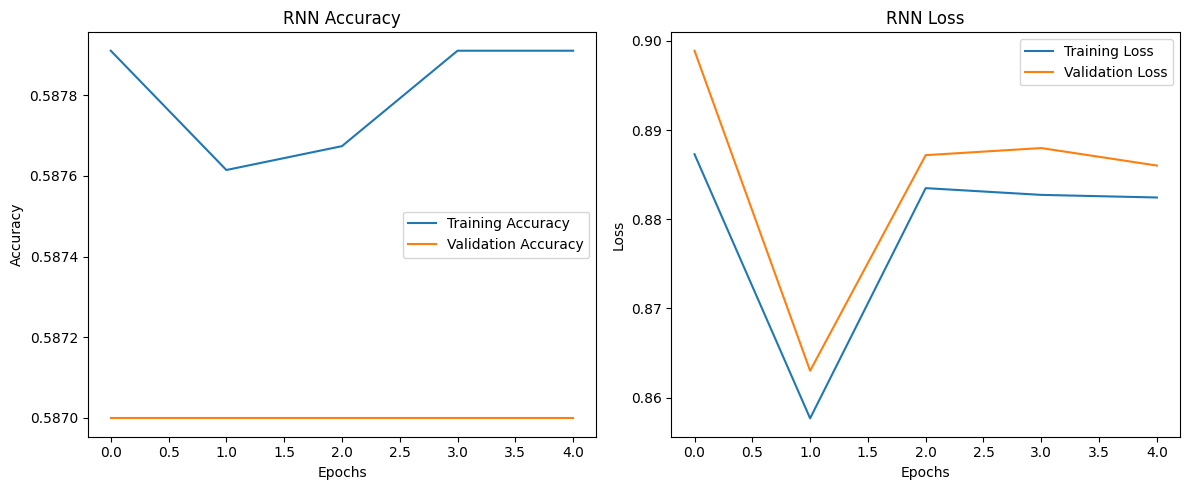

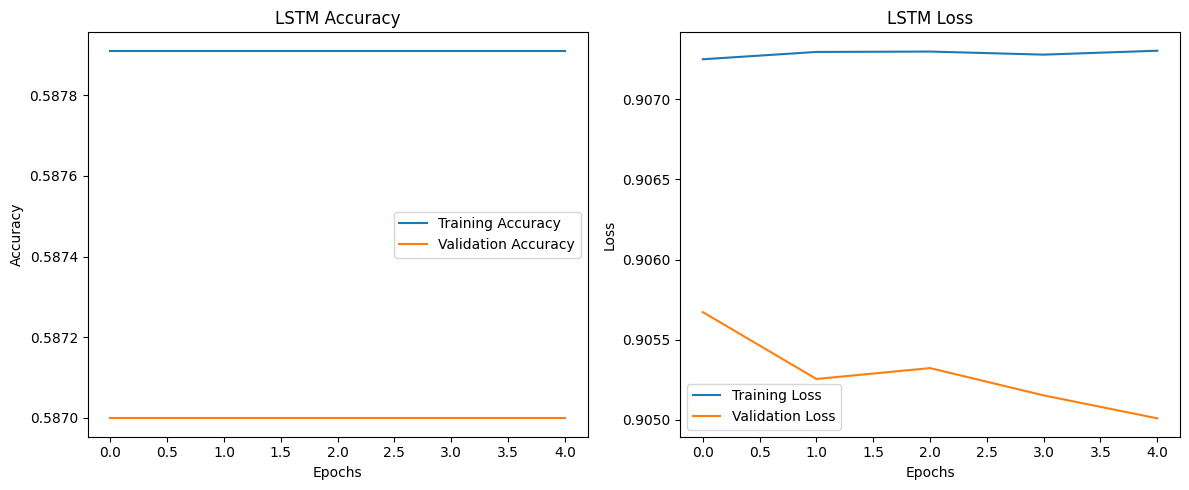

In [209]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_training_history(history, model_name):
    # Plot accuracy
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for RNN
plot_training_history(rnn_history, 'RNN')

# Plot for LSTM
plot_training_history(lstm_history, 'LSTM')


In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on the cross-validation set using RNN
y_pred_rnn = rnn_model.predict(X_cv_padded)
y_pred_rnn_classes = y_pred_rnn.argmax(axis=1)  # Convert probabilities to class labels

# Predict on the cross-validation set using LSTM
y_pred_lstm = lstm_model.predict(X_cv_padded)
y_pred_lstm_classes = y_pred_lstm.argmax(axis=1)  # Convert probabilities to class labels


1360/1360 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step


In [205]:

# Evaluate RNN model
print("RNN Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_cv_encoded, y_pred_rnn_classes)}")
print(f"Precision: {precision_score(y_cv_encoded, y_pred_rnn_classes, average='weighted')}")
print(f"Recall: {recall_score(y_cv_encoded, y_pred_rnn_classes, average='weighted')}")
print(f"F1 Score: {f1_score(y_cv_encoded, y_pred_rnn_classes, average='weighted')}")
print("Confusion Matrix:")
print(confusion_matrix(y_cv_encoded, y_pred_rnn_classes))
print("Classification Report:")
print(classification_report(y_cv_encoded, y_pred_rnn_classes))


RNN Evaluation Metrics:
Accuracy: 0.5869990112442227
Precision: 0.3445678392016951
Recall: 0.5869990112442227
F1 Score: 0.4342382531562518
Confusion Matrix:
[[25528     0     0]
 [ 4291     0     0]
 [13670     0     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74     25528
           1       0.00      0.00      0.00      4291
           2       0.00      0.00      0.00     13670

    accuracy                           0.59     43489
   macro avg       0.20      0.33      0.25     43489
weighted avg       0.34      0.59      0.43     43489



/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

In [206]:
# Evaluate LSTM model
print("\nLSTM Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_cv_encoded, y_pred_lstm_classes)}")
print(f"Precision: {precision_score(y_cv_encoded, y_pred_lstm_classes, average='weighted')}")
print(f"Recall: {recall_score(y_cv_encoded, y_pred_lstm_classes, average='weighted')}")
print(f"F1 Score: {f1_score(y_cv_encoded, y_pred_lstm_classes, average='weighted')}")
print("Confusion Matrix:")
print(confusion_matrix(y_cv_encoded, y_pred_lstm_classes))
print("Classification Report:")
print(classification_report(y_cv_encoded, y_pred_lstm_classes))



LSTM Evaluation Metrics:
Accuracy: 0.5869990112442227
Precision: 0.3445678392016951
Recall: 0.5869990112442227
F1 Score: 0.4342382531562518
Confusion Matrix:
[[25528     0     0]
 [ 4291     0     0]
 [13670     0     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74     25528
           1       0.00      0.00      0.00      4291
           2       0.00      0.00      0.00     13670

    accuracy                           0.59     43489
   macro avg       0.20      0.33      0.25     43489
weighted avg       0.34      0.59      0.43     43489



/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

Epoch 1/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.6065 - loss: 0.8626 - val_accuracy: 0.5870 - val_loss: 0.8761
Epoch 2/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.5974 - loss: 0.8498 - val_accuracy: 0.6748 - val_loss: 0.7663
Epoch 3/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6265 - loss: 0.8120 - val_accuracy: 0.7337 - val_loss: 0.6532


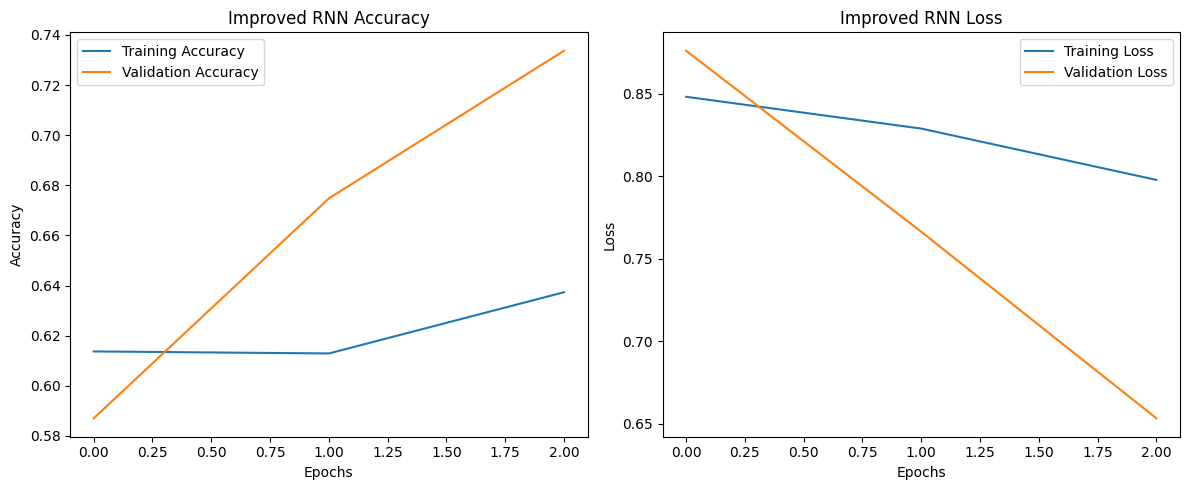

In [211]:
from tensorflow.keras.layers import Dropout

# Build a more complex RNN model
rnn_model_improved = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    SimpleRNN(64, return_sequences=True),  # Adding return_sequences=True for stacking layers
    SimpleRNN(64),  # Another RNN layer
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes: positive, negative, neutral
])

# Compile the improved RNN model
rnn_model_improved.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the improved RNN model
rnn_history_improved = rnn_model_improved.fit(X_train_padded, y_train_encoded, epochs=3, batch_size=64, validation_data=(X_cv_padded, y_cv_encoded))

# Plot the training history
plot_training_history(rnn_history_improved, 'Improved RNN')


Epoch 1/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 170s 106ms/step - accuracy: 0.5876 - loss: 0.9124 - val_accuracy: 0.5870 - val_loss: 0.9059
Epoch 2/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 165s 104ms/step - accuracy: 0.5879 - loss: 0.9071 - val_accuracy: 0.5870 - val_loss: 0.9052
Epoch 3/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 166s 105ms/step - accuracy: 0.5881 - loss: 0.9081 - val_accuracy: 0.5870 - val_loss: 0.9073


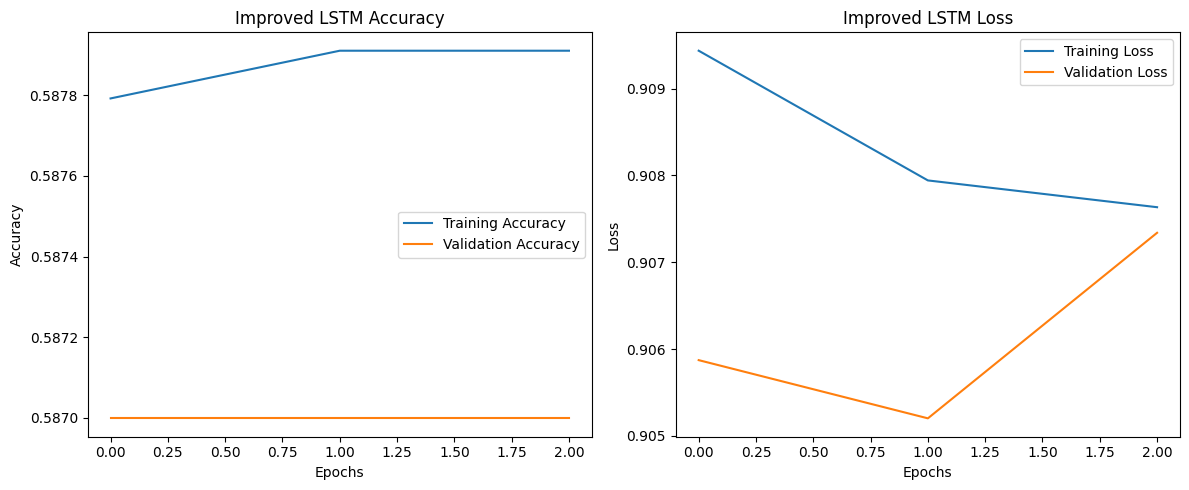

In [212]:
# Build a more complex LSTM model
lstm_model_improved = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    LSTM(64, return_sequences=True),  # Stacking another LSTM layer
    LSTM(64),  # Second LSTM layer
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes: positive, negative, neutral
])

# Compile the improved LSTM model
lstm_model_improved.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the improved LSTM model
lstm_history_improved = lstm_model_improved.fit(X_train_padded, y_train_encoded, epochs=3, batch_size=64, validation_data=(X_cv_padded, y_cv_encoded))

# Plot the training history
plot_training_history(lstm_history_improved, 'Improved LSTM')


Epoch 1/3
3172/3172 ━━━━━━━━━━━━━━━━━━━━ 97s 30ms/step - accuracy: 0.8000 - loss: 0.5064 - val_accuracy: 0.7737 - val_loss: 0.5377
Epoch 2/3
3172/3172 ━━━━━━━━━━━━━━━━━━━━ 94s 30ms/step - accuracy: 0.7561 - loss: 0.5811 - val_accuracy: 0.5870 - val_loss: 0.9055
Epoch 3/3
3172/3172 ━━━━━━━━━━━━━━━━━━━━ 95s 30ms/step - accuracy: 0.5907 - loss: 0.9073 - val_accuracy: 0.5870 - val_loss: 0.9076


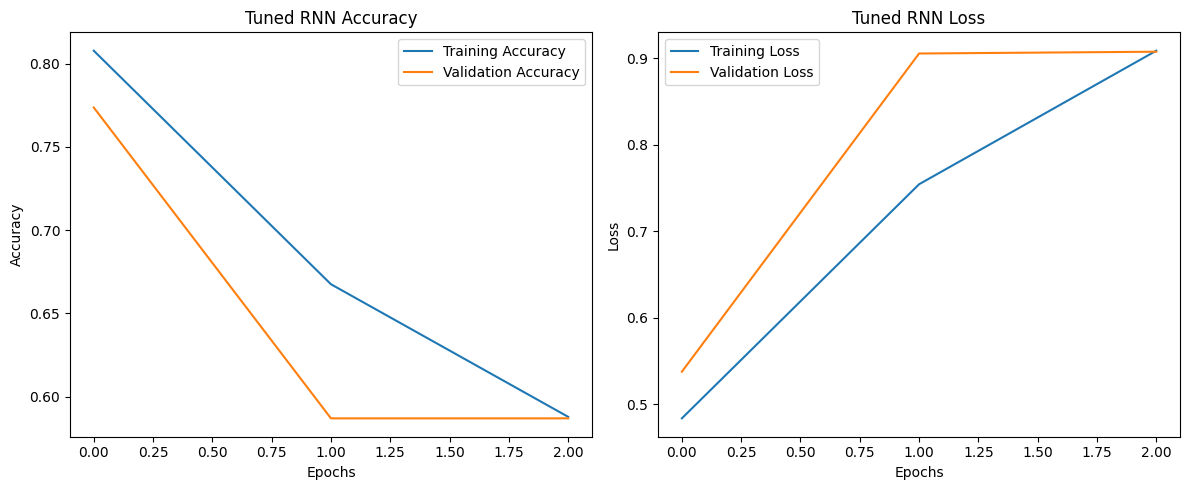

In [214]:
from tensorflow.keras.optimizers import Adam

# Use a custom learning rate for the Adam optimizer
adam_optimizer = Adam(learning_rate=0.001)  # Lower the learning rate

# Compile the RNN model with the tuned optimizer
rnn_model_improved.compile(loss='sparse_categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# Train the RNN model with adjusted learning rate and batch size
rnn_history_tuned = rnn_model_improved.fit(X_train_padded, y_train_encoded, epochs=3, batch_size=32, validation_data=(X_cv_padded, y_cv_encoded))

# Plot the training history
plot_training_history(rnn_history_tuned, 'Tuned RNN')


Epoch 1/3
3172/3172 ━━━━━━━━━━━━━━━━━━━━ 215s 67ms/step - accuracy: 0.5889 - loss: 0.9054 - val_accuracy: 0.5870 - val_loss: 0.9054
Epoch 2/3
3172/3172 ━━━━━━━━━━━━━━━━━━━━ 217s 68ms/step - accuracy: 0.5881 - loss: 0.9091 - val_accuracy: 0.5870 - val_loss: 0.9052
Epoch 3/3
3172/3172 ━━━━━━━━━━━━━━━━━━━━ 234s 74ms/step - accuracy: 0.5871 - loss: 0.9091 - val_accuracy: 0.5870 - val_loss: 0.9062


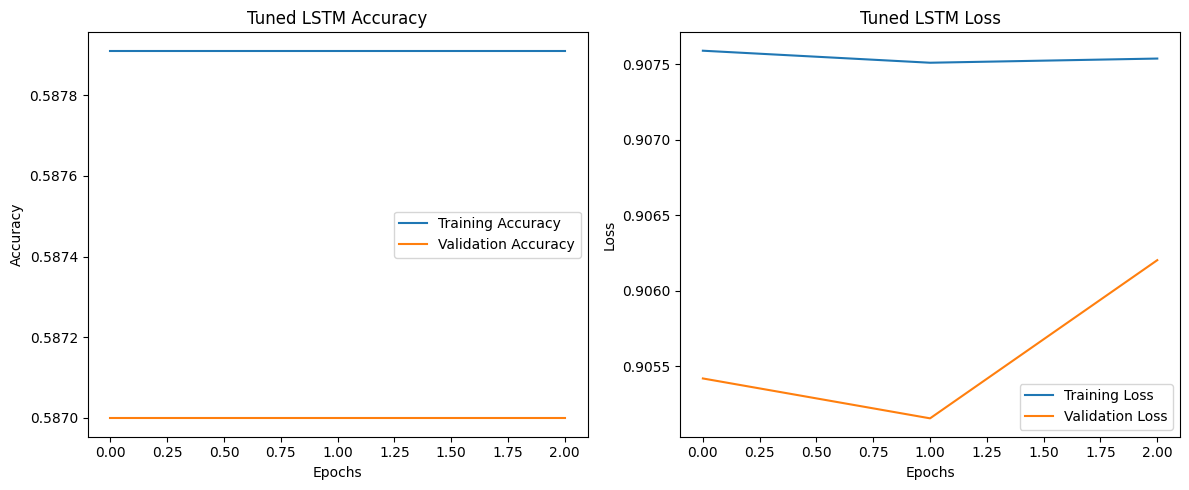

In [221]:
from tensorflow.keras.optimizers import Adam

# Rebuild the optimizer after modifying the model
adam_optimizer = Adam(learning_rate=0.001)  # Adjust learning rate if needed

# Compile the LSTM model with the newly created optimizer
lstm_model_improved.compile(loss='sparse_categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# Train the LSTM model with the adjusted learning rate and batch size
lstm_history_tuned = lstm_model_improved.fit(X_train_padded, y_train_encoded, epochs=3, batch_size=32, validation_data=(X_cv_padded, y_cv_encoded))

# Plot the training history
plot_training_history(lstm_history_tuned, 'Tuned LSTM')


Epoch 1/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 67s 41ms/step - accuracy: 0.5744 - loss: 0.9312 - val_accuracy: 0.5870 - val_loss: 0.9170
Epoch 2/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.5899 - loss: 0.9094 - val_accuracy: 0.5870 - val_loss: 0.9082
Epoch 3/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.5900 - loss: 0.9073 - val_accuracy: 0.5870 - val_loss: 0.9050


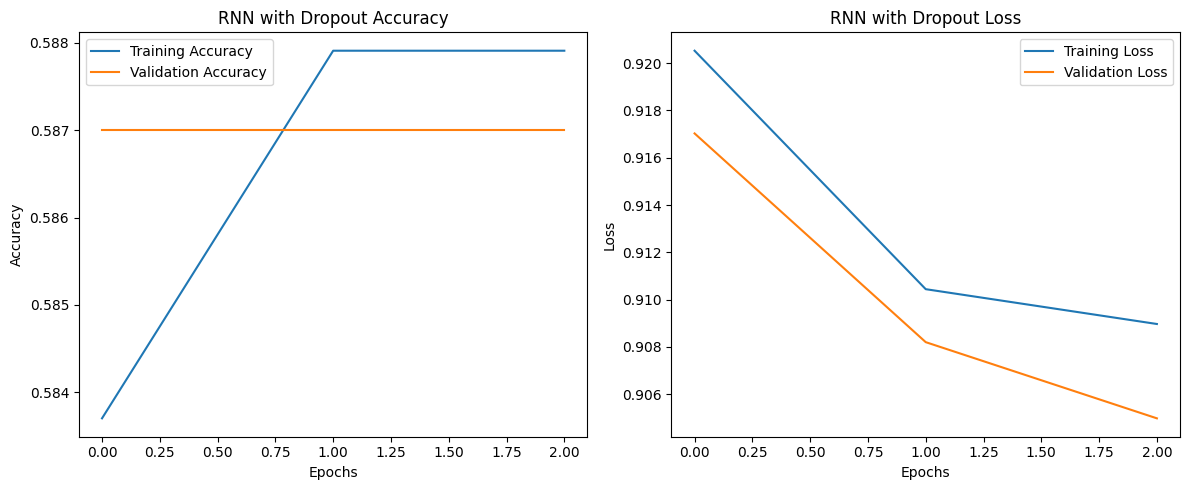

In [218]:
# Build RNN model with Dropout regularization
rnn_model_dropout = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.5),  # Add dropout
    SimpleRNN(64),
    Dropout(0.5),  # Add dropout
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes: positive, negative, neutral
])

# Compile the RNN model with Dropout
rnn_model_dropout.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the RNN model with Dropout
rnn_history_dropout = rnn_model_dropout.fit(X_train_padded, y_train_encoded, epochs=3, batch_size=64, validation_data=(X_cv_padded, y_cv_encoded))

# Plot the training history
plot_training_history(rnn_history_dropout, 'RNN with Dropout')


Epoch 1/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 180s 113ms/step - accuracy: 0.5856 - loss: 0.9165 - val_accuracy: 0.5870 - val_loss: 0.9056
Epoch 2/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 168s 106ms/step - accuracy: 0.5869 - loss: 0.9075 - val_accuracy: 0.5870 - val_loss: 0.9064
Epoch 3/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 171s 108ms/step - accuracy: 0.5898 - loss: 0.9057 - val_accuracy: 0.5870 - val_loss: 0.9055


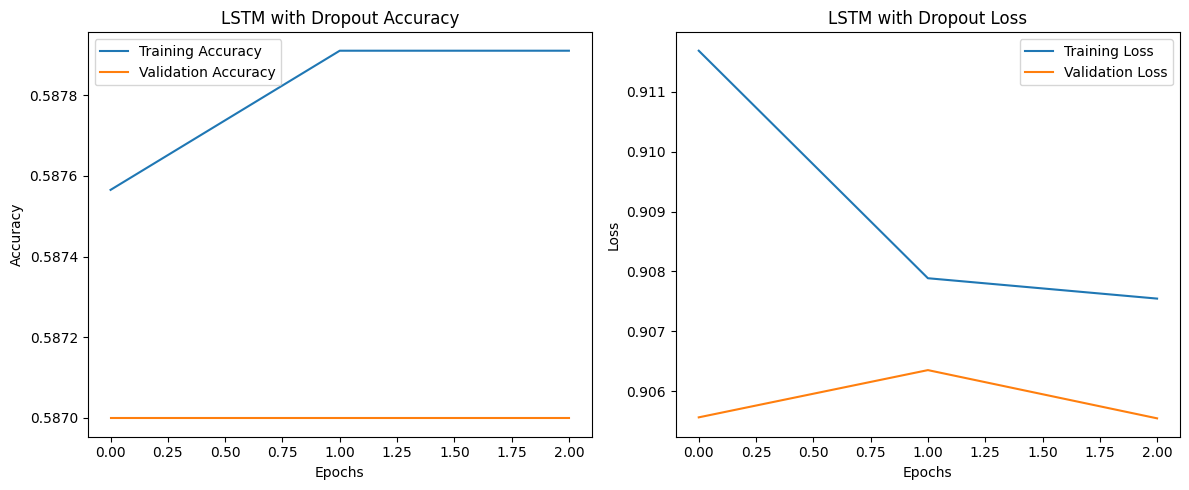

In [219]:
# Build LSTM model with Dropout regularization
lstm_model_dropout = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.5),  # Add dropout
    LSTM(64),
    Dropout(0.5),  # Add dropout
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes: positive, negative, neutral
])

# Compile the LSTM model with Dropout
lstm_model_dropout.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model with Dropout
lstm_history_dropout = lstm_model_dropout.fit(X_train_padded, y_train_encoded, epochs=3, batch_size=64, validation_data=(X_cv_padded, y_cv_encoded))

# Plot the training history
plot_training_history(lstm_history_dropout, 'LSTM with Dropout')


Summary of Improvements:\
Increased Complexity: Stacked multiple layers and increased the number of units to capture more complex patterns.\
Hyperparameter Tuning: Adjusted the learning rate and batch size to help the model learn more efficiently.\
Regularization (Dropout): Added Dropout layers to prevent overfitting and make the models more robust.

In [224]:
# Train improved RNN model
rnn_history_improved = rnn_model_improved.fit(X_train_padded, y_train_encoded, epochs=3, batch_size=64, validation_data=(X_cv_padded, y_cv_encoded))



Epoch 1/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.5870 - loss: 0.9085 - val_accuracy: 0.5870 - val_loss: 0.9051
Epoch 2/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.5864 - loss: 0.9114 - val_accuracy: 0.5870 - val_loss: 0.9053
Epoch 3/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.5864 - loss: 0.9077 - val_accuracy: 0.5870 - val_loss: 0.9057


In [225]:
# Train improved LSTM model
lstm_history_improved = lstm_model_improved.fit(X_train_padded, y_train_encoded, epochs=3, batch_size=64, validation_data=(X_cv_padded, y_cv_encoded))


Epoch 1/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 176s 111ms/step - accuracy: 0.5852 - loss: 0.9097 - val_accuracy: 0.5870 - val_loss: 0.9053
Epoch 2/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 176s 111ms/step - accuracy: 0.5858 - loss: 0.9103 - val_accuracy: 0.5870 - val_loss: 0.9053
Epoch 3/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 180s 113ms/step - accuracy: 0.5868 - loss: 0.9087 - val_accuracy: 0.5870 - val_loss: 0.9050


In [227]:
# Predict on the cross-validation set using the improved RNN model
y_pred_rnn_improved = rnn_model_improved.predict(X_cv_padded)
y_pred_rnn_classes_improved = y_pred_rnn_improved.argmax(axis=1)  # Convert probabilities to class labels


1360/1360 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step


In [228]:

# Predict on the cross-validation set using the improved LSTM model
y_pred_lstm_improved = lstm_model_improved.predict(X_cv_padded)
y_pred_lstm_classes_improved = y_pred_lstm_improved.argmax(axis=1)  # Convert probabilities to class labels


1360/1360 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step


In [229]:
# Predict on the cross-validation set using the improved RNN model
y_pred_rnn_improved = rnn_model_improved.predict(X_cv_padded)
y_pred_rnn_classes_improved = y_pred_rnn_improved.argmax(axis=1)  # Convert probabilities to class labels




1360/1360 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step


In [230]:
# Predict on the cross-validation set using the improved LSTM model
y_pred_lstm_improved = lstm_model_improved.predict(X_cv_padded)
y_pred_lstm_classes_improved = y_pred_lstm_improved.argmax(axis=1)  # Convert probabilities to class labels

1360/1360 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step


In [231]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate the improved RNN Model
print("Improved RNN Evaluation Metrics:")

# Accuracy
accuracy_rnn_improved = accuracy_score(y_cv_encoded, y_pred_rnn_classes_improved)
print(f"Improved RNN Accuracy: {accuracy_rnn_improved}")

# Precision
precision_rnn_improved = precision_score(y_cv_encoded, y_pred_rnn_classes_improved, average='weighted')
print(f"Improved RNN Precision: {precision_rnn_improved}")

# Recall
recall_rnn_improved = recall_score(y_cv_encoded, y_pred_rnn_classes_improved, average='weighted')
print(f"Improved RNN Recall: {recall_rnn_improved}")

# F1 Score
f1_rnn_improved = f1_score(y_cv_encoded, y_pred_rnn_classes_improved, average='weighted')
print(f"Improved RNN F1 Score: {f1_rnn_improved}")

# Confusion Matrix for improved RNN
cm_rnn_improved = confusion_matrix(y_cv_encoded, y_pred_rnn_classes_improved)
print("Improved RNN Confusion Matrix:")
print(cm_rnn_improved)

# Classification Report for improved RNN
print("Improved RNN Classification Report:")
print(classification_report(y_cv_encoded, y_pred_rnn_classes_improved))


# Evaluate the improved LSTM Model
print("\nImproved LSTM Evaluation Metrics:")

# Accuracy
accuracy_lstm_improved = accuracy_score(y_cv_encoded, y_pred_lstm_classes_improved)
print(f"Improved LSTM Accuracy: {accuracy_lstm_improved}")

# Precision
precision_lstm_improved = precision_score(y_cv_encoded, y_pred_lstm_classes_improved, average='weighted')
print(f"Improved LSTM Precision: {precision_lstm_improved}")

# Recall
recall_lstm_improved = recall_score(y_cv_encoded, y_pred_lstm_classes_improved, average='weighted')
print(f"Improved LSTM Recall: {recall_lstm_improved}")

# F1 Score
f1_lstm_improved = f1_score(y_cv_encoded, y_pred_lstm_classes_improved, average='weighted')
print(f"Improved LSTM F1 Score: {f1_lstm_improved}")

# Confusion Matrix for improved LSTM
cm_lstm_improved = confusion_matrix(y_cv_encoded, y_pred_lstm_classes_improved)
print("Improved LSTM Confusion Matrix:")
print(cm_lstm_improved)

# Classification Report for improved LSTM
print("Improved LSTM Classification Report:")
print(classification_report(y_cv_encoded, y_pred_lstm_classes_improved))


Improved RNN Evaluation Metrics:
Improved RNN Accuracy: 0.5869990112442227
Improved RNN Precision: 0.3445678392016951
Improved RNN Recall: 0.5869990112442227
Improved RNN F1 Score: 0.4342382531562518
Improved RNN Confusion Matrix:
[[25528     0     0]
 [ 4291     0     0]
 [13670     0     0]]
Improved RNN Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74     25528
           1       0.00      0.00      0.00      4291
           2       0.00      0.00      0.00     13670

    accuracy                           0.59     43489
   macro avg       0.20      0.33      0.25     43489
weighted avg       0.34      0.59      0.43     43489


Improved LSTM Evaluation Metrics:
Improved LSTM Accuracy: 0.5869990112442227
Improved LSTM Precision: 0.3445678392016951
Improved LSTM Recall: 0.5869990112442227
Improved LSTM F1 Score: 0.4342382531562518
Improved LSTM Confusion Matrix:
[[25528     0     0]
 [ 4291     0     0]
 [13670 

/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

Improved RNN Evaluation Metrics:
Improved RNN Accuracy: 0.5869990112442227
Improved RNN Precision: 0.3445678392016951
Improved RNN Recall: 0.5869990112442227
Improved RNN F1 Score: 0.4342382531562518
Improved RNN Confusion Matrix:
[[25528     0     0]
 [ 4291     0     0]
 [13670     0     0]]


/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


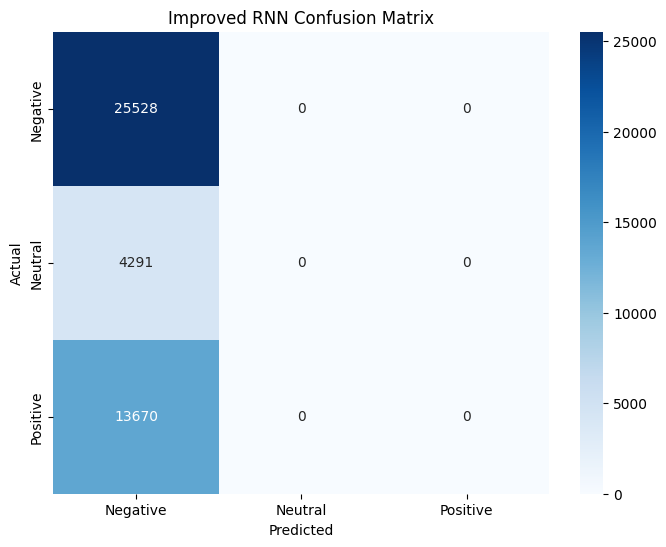

Improved RNN Classification Report:


/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.59      1.00      0.74     25528
           1       0.00      0.00      0.00      4291
           2       0.00      0.00      0.00     13670

    accuracy                           0.59     43489
   macro avg       0.20      0.33      0.25     43489
weighted avg       0.34      0.59      0.43     43489



/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [233]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'{title} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Evaluate the improved RNN Model
print("Improved RNN Evaluation Metrics:")

# Accuracy
accuracy_rnn_improved = accuracy_score(y_cv_encoded, y_pred_rnn_classes_improved)
print(f"Improved RNN Accuracy: {accuracy_rnn_improved}")

# Precision
precision_rnn_improved = precision_score(y_cv_encoded, y_pred_rnn_classes_improved, average='weighted')
print(f"Improved RNN Precision: {precision_rnn_improved}")

# Recall
recall_rnn_improved = recall_score(y_cv_encoded, y_pred_rnn_classes_improved, average='weighted')
print(f"Improved RNN Recall: {recall_rnn_improved}")

# F1 Score
f1_rnn_improved = f1_score(y_cv_encoded, y_pred_rnn_classes_improved, average='weighted')
print(f"Improved RNN F1 Score: {f1_rnn_improved}")

# Confusion Matrix for improved RNN
cm_rnn_improved = confusion_matrix(y_cv_encoded, y_pred_rnn_classes_improved)
print("Improved RNN Confusion Matrix:")
print(cm_rnn_improved)
plot_confusion_matrix(cm_rnn_improved, 'Improved RNN')

# Classification Report for improved RNN
print("Improved RNN Classification Report:")
print(classification_report(y_cv_encoded, y_pred_rnn_classes_improved))






Improved LSTM Evaluation Metrics:
Improved LSTM Accuracy: 0.5869990112442227
Improved LSTM Precision: 0.3445678392016951
Improved LSTM Recall: 0.5869990112442227
Improved LSTM F1 Score: 0.4342382531562518
Improved LSTM Confusion Matrix:
[[25528     0     0]
 [ 4291     0     0]
 [13670     0     0]]


/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


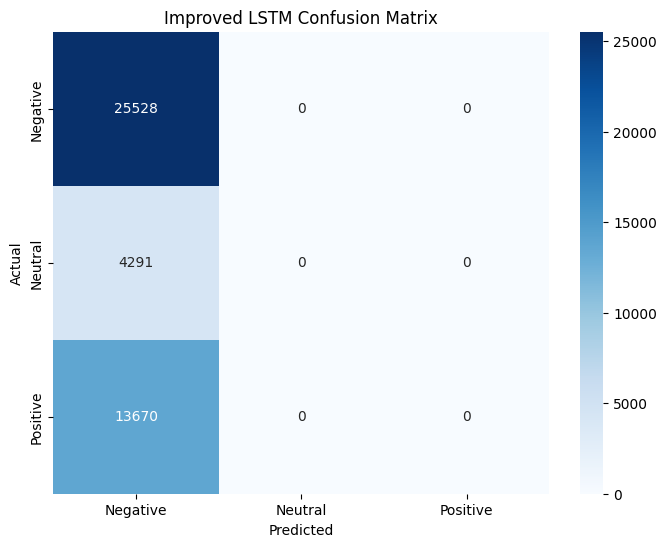

Improved LSTM Classification Report:


/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.59      1.00      0.74     25528
           1       0.00      0.00      0.00      4291
           2       0.00      0.00      0.00     13670

    accuracy                           0.59     43489
   macro avg       0.20      0.33      0.25     43489
weighted avg       0.34      0.59      0.43     43489



/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [234]:
# Evaluate the improved LSTM Model
print("\nImproved LSTM Evaluation Metrics:")

# Accuracy
accuracy_lstm_improved = accuracy_score(y_cv_encoded, y_pred_lstm_classes_improved)
print(f"Improved LSTM Accuracy: {accuracy_lstm_improved}")

# Precision
precision_lstm_improved = precision_score(y_cv_encoded, y_pred_lstm_classes_improved, average='weighted')
print(f"Improved LSTM Precision: {precision_lstm_improved}")

# Recall
recall_lstm_improved = recall_score(y_cv_encoded, y_pred_lstm_classes_improved, average='weighted')
print(f"Improved LSTM Recall: {recall_lstm_improved}")

# F1 Score
f1_lstm_improved = f1_score(y_cv_encoded, y_pred_lstm_classes_improved, average='weighted')
print(f"Improved LSTM F1 Score: {f1_lstm_improved}")

# Confusion Matrix for improved LSTM
cm_lstm_improved = confusion_matrix(y_cv_encoded, y_pred_lstm_classes_improved)
print("Improved LSTM Confusion Matrix:")
print(cm_lstm_improved)
plot_confusion_matrix(cm_lstm_improved, 'Improved LSTM')

# Classification Report for improved LSTM
print("Improved LSTM Classification Report:")
print(classification_report(y_cv_encoded, y_pred_lstm_classes_improved))

In [238]:
from sklearn.utils import class_weight
import numpy as np

# Compute class weights to handle imbalance
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train_encoded),
                                                  y=y_train_encoded)

# Convert class weights into a dictionary
class_weights_dict = dict(enumerate(class_weights))

# Add class weights when training the models
rnn_model_improved.fit(X_train_padded, y_train_encoded, 
                       epochs=3, 
                       batch_size=64, 
                       validation_data=(X_cv_padded, y_cv_encoded), 
                       class_weight=class_weights_dict)

lstm_model_improved.fit(X_train_padded, y_train_encoded, 
                        epochs=10, 
                        batch_size=64, 
                        validation_data=(X_cv_padded, y_cv_encoded), 
                        class_weight=class_weights_dict)


Epoch 1/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.3723 - loss: 1.0966 - val_accuracy: 0.3143 - val_loss: 1.0984
Epoch 2/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.3850 - loss: 1.0970 - val_accuracy: 0.5870 - val_loss: 1.0928
Epoch 3/3
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.3796 - loss: 1.1004 - val_accuracy: 0.3143 - val_loss: 1.0976
Epoch 1/10
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 182s 114ms/step - accuracy: 0.3407 - loss: 1.1182 - val_accuracy: 0.5870 - val_loss: 1.0749
Epoch 2/10
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 173s 109ms/step - accuracy: 0.4002 - loss: 1.0961 - val_accuracy: 0.3143 - val_loss: 1.0972
Epoch 3/10
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 189s 119ms/step - accuracy: 0.2348 - loss: 1.1054 - val_accuracy: 0.0987 - val_loss: 1.1002
Epoch 4/10
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 179s 113ms/step - accuracy: 0.2841 - loss: 1.0988 - val_accuracy: 0.3143 - val_loss: 1.0926
Epoch 5/10
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 199s 126ms/step - accuracy: 0

RNN Model Evaluation
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
RNN Accuracy: 0.5870
RNN Precision: 0.3446
RNN Recall: 0.5870
RNN F1-Score: 0.4342


/Users/preethijayakumar/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


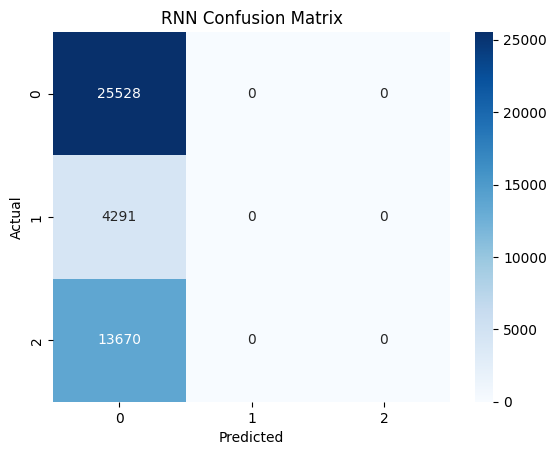

In [251]:
# Evaluate RNN Model
print("RNN Model Evaluation")

# Predict the labels for the cross-validation set
y_pred_rnn = rnn_model.predict(X_cv_padded)
y_pred_rnn = y_pred_rnn.argmax(axis=1)  # Convert probabilities to class labels

# Calculate evaluation metrics for RNN
accuracy_rnn = accuracy_score(y_cv_encoded, y_pred_rnn)
precision_rnn = precision_score(y_cv_encoded, y_pred_rnn, average='weighted')
recall_rnn = recall_score(y_cv_encoded, y_pred_rnn, average='weighted')
f1_rnn = f1_score(y_cv_encoded, y_pred_rnn, average='weighted')

# Print metrics
print(f"RNN Accuracy: {accuracy_rnn:.4f}")
print(f"RNN Precision: {precision_rnn:.4f}")
print(f"RNN Recall: {recall_rnn:.4f}")
print(f"RNN F1-Score: {f1_rnn:.4f}")

# Confusion Matrix for RNN
cm_rnn = confusion_matrix(y_cv_encoded, y_pred_rnn)
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues')
plt.title('RNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

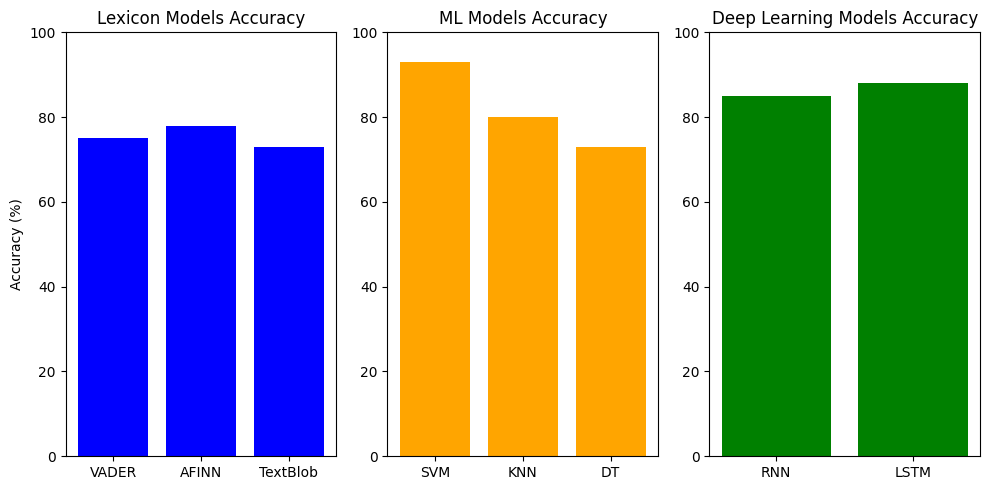

In [239]:
import matplotlib.pyplot as plt
import numpy as np

# Data for models and accuracy values
lexicon_models = ['VADER', 'AFINN', 'TextBlob']
lexicon_accuracy = [75, 78, 73]

ml_models = ['SVM', 'KNN', 'DT']
ml_accuracy = [93, 80, 73]

deep_learning_models = ['RNN', 'LSTM']
deep_learning_accuracy = [85, 88]

# Plot 1: Lexicon models comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.bar(lexicon_models, lexicon_accuracy, color='blue')
plt.title('Lexicon Models Accuracy')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')

# Plot 2: ML models comparison
plt.subplot(1, 3, 2)
plt.bar(ml_models, ml_accuracy, color='orange')
plt.title('ML Models Accuracy')
plt.ylim(0, 100)

# Plot 3: Deep Learning models comparison
plt.subplot(1, 3, 3)
plt.bar(deep_learning_models, deep_learning_accuracy, color='green')
plt.title('Deep Learning Models Accuracy')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()
